## 1. BERT

In [6]:
!pip install transformers

In [1]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

def sentence_to_vector(sentence):
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = BertModel.from_pretrained("bert-base-uncased")
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state
    cls_vector = hidden_states[:, 0, :]
    return cls_vector


sentence = "This is an example sentence."
vector = sentence_to_vector(sentence)

/home/s5526309/.pyenv/versions/anaconda3-2022.05/envs/motionclip/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
sentence_1= "father"
vector_1 = sentence_to_vector(sentence_1)

sentence_2= "male"
vector_2 = sentence_to_vector(sentence_2)

sentence_3= "dog"
vector_3 = sentence_to_vector(sentence_3)

In [8]:
np.linalg.norm(vector_1-vector_2)

6.6814303

In [9]:
np.linalg.norm(vector_1-vector_3)

4.454002

## 2. tSNE

In [10]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_df = pd.read_csv("gender_classification.csv")
feature = data_df.to_numpy()[:,:-1]
label = data_df.to_numpy()[:,-1]
label = np.where(label=="Male", 0, 1)
feature.shape

(5001, 7)

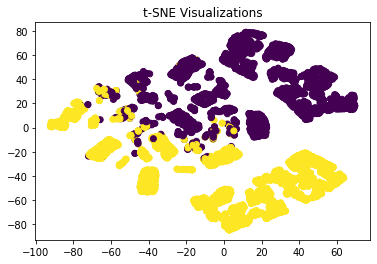

In [12]:
tsne = TSNE(n_components=2, random_state=3)
reduced_vectors = tsne.fit_transform(feature)


plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c = label)

plt.title("t-SNE Visualizations")
plt.show()

## 3. PCA

In [13]:
from sklearn.decomposition import PCA

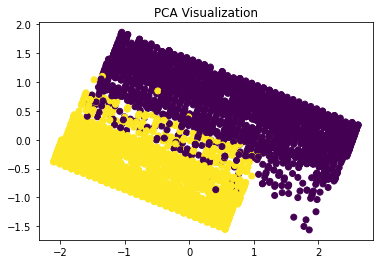

In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(feature)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c = label)

plt.title("PCA Visualization")
plt.show()

https://www.artec3d.cn/3d-models/ply?page=3

In [15]:
!pip install trimesh

     |████████████████████████████████| 704 kB 9.0 MB/s eta 0:00:01


In [16]:
tx = 0
ty = 0
tz = 0
translation_matrix = np.array([[1, 0, 0, tx],
                  [0, 1, 0, ty],
                  [0, 0, 1, tz],
                  [0, 0, 0, 1]])

sx = 1
sy = 2
sz = 1
scale_matrix = np.array([[sx, 0,  0, 0],
              [0, sy,  0, 0],
              [0, 0, sz, 0],
              [0, 0,  0, 1]])

theta = np.pi/4
rotation_z_matrix = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                [np.sin(theta),  np.cos(theta), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

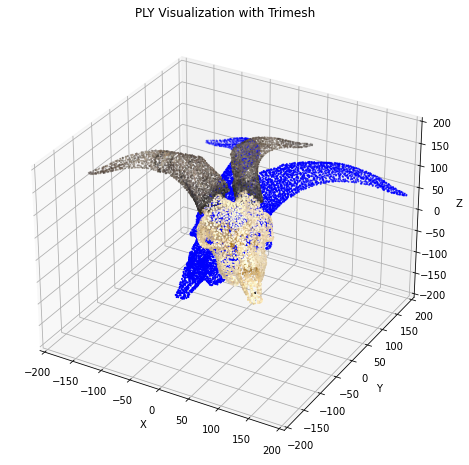

In [22]:
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ply_file = "Goat skull.ply"
mesh = trimesh.load(ply_file)

vertices = mesh.vertices
colors = mesh.visual.vertex_colors[:, :3]/255

vertices = np.concatenate([vertices, np.ones((len(vertices),1))], axis=1)
#translated_vertices = np.dot(vertices, translation_matrix.T)
#scaled_vertices = np.dot(vertices, scale_matrix)
rotated_vertices = np.dot(vertices, rotation_z_matrix.T)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(vertices[::100, 0], vertices[::100, 1], vertices[::100, 2], c="b", s=1, label='Vertices')
ax.scatter(rotated_vertices[::100, 0], rotated_vertices[::100, 1], rotated_vertices[::100, 2], c=colors[::100], s=1, label='Vertices')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)

ax.set_title('PLY Visualization with Trimesh')

plt.show()


In [23]:
0, -100, -100

(0, -100, -100)

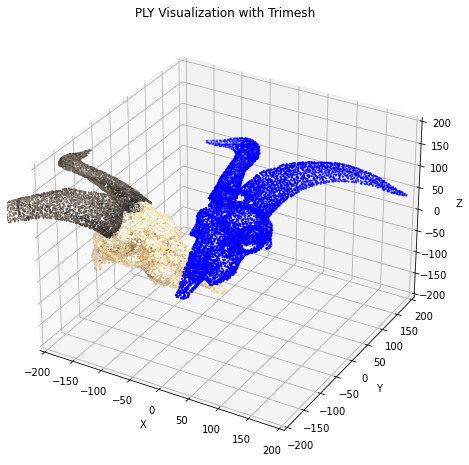

In [24]:
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ply_file = "Goat skull.ply"
mesh = trimesh.load(ply_file)

vertices = mesh.vertices
colors = mesh.visual.vertex_colors[:, :3]/255

vertices = np.concatenate([vertices, np.ones((len(vertices),1))], axis=1)

translation_matrix_1 = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 100],
                  [0, 0, 1, 100],
                  [0, 0, 0, 1]])

theta = np.pi/2
rotation_z_matrix = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                [np.sin(theta),  np.cos(theta), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

translation_matrix_2 = np.array([[1, 0, 0, 0],
                  [0, 1, 0, -100],
                  [0, 0, 1, -100],
                  [0, 0, 0, 1]])


translated_vertices = np.dot(vertices, translation_matrix_1.T)
#scaled_vertices = np.dot(vertices, scale_matrix)
rotated_vertices = np.dot(translated_vertices, rotation_z_matrix.T)
translated_vertices = np.dot(rotated_vertices, translation_matrix_2.T)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(vertices[::100, 0], vertices[::100, 1], vertices[::100, 2], c="b", s=1, label='Vertices')
ax.scatter(translated_vertices[::100, 0], translated_vertices[::100, 1], translated_vertices[::100, 2], c=colors[::100], s=1, label='Vertices')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)

ax.set_title('PLY Visualization with Trimesh')

plt.show()